In [13]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read the input file and check the data dimension

In [14]:
df=pd.read_csv("C:/Somduity/Python/german_credit.csv")
df.shape
df.dtypes


(1000, 21)

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X=df["default"]
y=df.drop(columns="default",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [3]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [15]:
# Print Shape of model data
df_mod=pd.get_dummies(df)
df_mod.head()
df_mod.shape

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [17]:
df_mod.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

# Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [38]:
df_mod_dep=df_mod["default"]
df_mod_ind=df_mod.drop(columns="default",axis=1)
y1=np.array(df_mod_dep)
X1=np.array(df_mod_ind)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3)
X1_train.shape
y1_train.shape
X1_test.shape
y1_test.shape

(700, 61)

(700,)

(300, 61)

(300,)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rf.fit(X1_train,y1_train)
pred=rf.predict(X1_test)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [47]:
from sklearn import metrics
acc_score=metrics.accuracy_score(pred,y1_test)
print(acc_score)
metrics.confusion_matrix(pred,y1_test)

0.7666666666666667


array([[193,  63],
       [  7,  37]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [55]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = df_mod_ind.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.097436
age,0.081718
duration_in_month,0.079444
account_check_status_no checking account,0.044977
installment_as_income_perc,0.037594
present_res_since,0.036000
account_check_status_< 0 DM,0.023379
credit_history_critical account/ other credits existing (not at this bank),0.021317
purpose_car (new),0.019403
credits_this_bank,0.019357


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [65]:
seed = 77
kfold = KFold(n_splits=20,random_state=seed)
results =cross_val_score(rf, X1, y1, scoring='mean_squared_error', cv=kfold)


In [8]:
#Calculate Mean score
# Calculate score standard deviation using std()

In [67]:
print("Mean Square Error: %.3f (%.3f)" % (results.mean(), results.std()))

Mean Square Error: -0.232 (0.072)


# Q8 Print the confusion matrix( 1 Marks)

In [71]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf, X1, y1, cv=kfold)
conf_mat = metrics.confusion_matrix(y1, y_pred)
print(conf_mat)

[[651  49]
 [183 117]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [72]:
results =cross_val_score(rf, X1, y1, scoring='accuracy', cv=kfold)


In [76]:
results.mean()

0.768

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [10]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [78]:
from sklearn.metrics import roc_curve, auc

Area Under the curve 0.6675000000000001


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

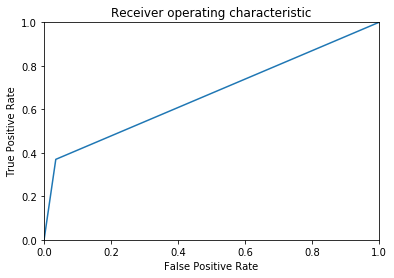

In [80]:
fpr,tpr, _ = roc_curve(y1_test,pred)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []